In [32]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝 패키지 추가
import statsmodels.api as sm
import sklearn

# 한글/차트 
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')

In [101]:
# Bream(도미) 데이터 35개
# 특징(feature)
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [102]:
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
print(fish_data)
print(len(fish_data))

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
49


In [103]:
fish_target = [1]*35 + [0]*14
print(fish_target)
print(len(fish_target))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
49


#### 전체데이터 35개 훈련세트로 14개를 테스트세트로 분리

In [104]:
# 훈련세트
train_input = fish_data[0:35]
train_target = fish_target[0:35]
#테스트세트
test_input = fish_data[35:]
test_target = fish_target[35:]

In [105]:
print(train_input)
print(len(train_input))

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0]]
35


In [106]:
print(test_input)
print(len(test_input))

[[9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
14


In [107]:
# 잘못된 훈련 타겟
print(train_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


#### K-최근접 이웃 알고리즘 모델

In [108]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [109]:
kn.fit(X=train_input, y=train_target)
kn.score(X=test_input, y=test_target)

0.0

In [110]:
kn.score(X=fish_data, y=fish_target)

0.7142857142857143

#### numpy로 배열화 / 데이터 확인

In [111]:
input_arr = np.array(fish_data)
input_arr

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [112]:
target_arr = np.array(fish_target)
print(target_arr)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [113]:
target_arr = np.array(fish_target)
target_arr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [114]:
input_arr.shape

(49, 2)

In [115]:
target_arr.shape

(49,)

In [116]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
index


array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [117]:
train_input = input_arr[index[0:35]]
train_target = input_arr[index[0:35]]

In [124]:
train_input

array([[  32. ,  340. ],
       [  12.4,   13.4],
       [  14.3,   19.7],
       [  12.2,   12.2],
       [  33. ,  700. ],
       [  36. ,  714. ],
       [  35. ,  720. ],
       [  35. ,  725. ],
       [  38.5,  955. ],
       [  33.5,  650. ],
       [  31.5,  500. ],
       [  29. ,  430. ],
       [  41. ,  950. ],
       [  30. ,  450. ],
       [  29. ,  363. ],
       [  29.7,  500. ],
       [  11.3,    8.7],
       [  11.8,   10. ],
       [  13. ,   12.2],
       [  32. ,  600. ],
       [  30.7,  500. ],
       [  33. ,  700. ],
       [  35. ,  700. ],
       [  41. ,  975. ],
       [  38.5,  920. ],
       [  25.4,  242. ],
       [  12. ,    9.8],
       [  39.5,  925. ],
       [  29.7,  450. ],
       [  37. , 1000. ],
       [  31. ,  500. ],
       [  10.5,    7.5],
       [  26.3,  290. ],
       [  34. ,  685. ],
       [  26.5,  340. ]])

In [118]:
train_target

array([[  32. ,  340. ],
       [  12.4,   13.4],
       [  14.3,   19.7],
       [  12.2,   12.2],
       [  33. ,  700. ],
       [  36. ,  714. ],
       [  35. ,  720. ],
       [  35. ,  725. ],
       [  38.5,  955. ],
       [  33.5,  650. ],
       [  31.5,  500. ],
       [  29. ,  430. ],
       [  41. ,  950. ],
       [  30. ,  450. ],
       [  29. ,  363. ],
       [  29.7,  500. ],
       [  11.3,    8.7],
       [  11.8,   10. ],
       [  13. ,   12.2],
       [  32. ,  600. ],
       [  30.7,  500. ],
       [  33. ,  700. ],
       [  35. ,  700. ],
       [  41. ,  975. ],
       [  38.5,  920. ],
       [  25.4,  242. ],
       [  12. ,    9.8],
       [  39.5,  925. ],
       [  29.7,  450. ],
       [  37. , 1000. ],
       [  31. ,  500. ],
       [  10.5,    7.5],
       [  26.3,  290. ],
       [  34. ,  685. ],
       [  26.5,  340. ]])

In [119]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [120]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [121]:
test_input

array([[ 10.6,   7. ],
       [  9.8,   6.7],
       [ 35. , 680. ],
       [ 11.2,   9.8],
       [ 31. , 475. ],
       [ 34.5, 620. ],
       [ 33.5, 610. ],
       [ 15. ,  19.9],
       [ 34. , 575. ],
       [ 30. , 390. ],
       [ 11.8,   9.9],
       [ 32. , 600. ],
       [ 36. , 850. ],
       [ 11. ,   9.7]])

<function matplotlib.pyplot.show(close=None, block=None)>

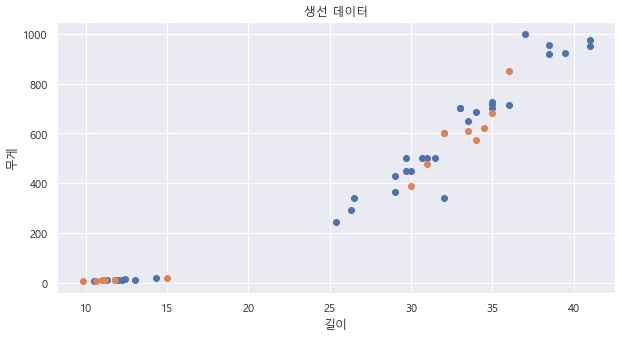

In [122]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_input[:,0], y=train_target[:,1])
plt.scatter(x=test_input[:,0],y=test_input[:,1])
plt.title('생선 데이터')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show

#### 두번째 머신러닝

In [126]:
# 훈련
kn.fit(X=train_input, y=train_target)

ValueError: Unknown label type: 'continuous-multioutput'

In [125]:
kn.score(X=test_input, y=test_input)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [89]:
kn.predict(X=test_input)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [90]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

#### 추가내용 (책에는 없는 내용)
1장 3절에 나왔던 30cm, 600g 짜리 의문 생선가지고 예측

In [91]:
#1_3 새로운 생선예측에 나왔던 데이터로 예측다시..
pred_input = np.array([[30,600]])

In [92]:
pred_input

array([[ 30, 600]])

In [93]:
kn.predict(X=pred_input)
# 나는 도미

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [94]:
pred_input = np.array ([[10.0, 8.7]])

In [95]:
kn.predict(X=pred_input)
#나는 빙어

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

#### 정리

실제 데이터(100) 중에서 70~80을 훈련세트, 나머지를 20~30를 테스트세트 사용합니다.

실제 데이터가 10만개 이하라면 훈련이 제대로 이루어지지 않을 수 있습니다. 그래서, 실무에서는 적어도 3년이상의 데이터를 수집한 뒤 training/test/verification을 진행

### 2장 2절러 가면서

In [97]:
kn.predic(X=[[25.0,150.0]])

AttributeError: 'KNeighborsClassifier' object has no attribute 'predic'